0 gamma
0      1.970000
1      1.748681
2      1.809044
3      2.058209
4      1.921870
         ...   
191    1.841722
192    1.688034
193    2.108967
194    1.869794
195    1.899069
Name: gamma, Length: 196, dtype: float64
standard deviation for gamma : 0.1398396760432456
1 g3f
0      0.155000
1      0.142019
2      0.139830
3      0.147694
4      0.149060
         ...   
191    0.146295
192    0.096259
193    0.152809
194    0.141226
195    0.155846
Name: g3f, Length: 196, dtype: float64
standard deviation for g3f : 0.01577756195854285
2 g3D
0      0.014400
1      0.013382
2      0.020749
3      0.004907
4      0.015136
         ...   
191    0.013370
192    0.004945
193    0.012888
194    0.002955
195    0.013285
Name: g3D, Length: 196, dtype: float64
standard deviation for g3D : 0.00616838692596944
3 Nq2
0      0.222000
1      0.389717
2      0.366146
3      0.232696
4      0.170023
         ...   
191    0.059528
192    0.171184
193    0.142215
194    0.223281
195    0.357145
Nam

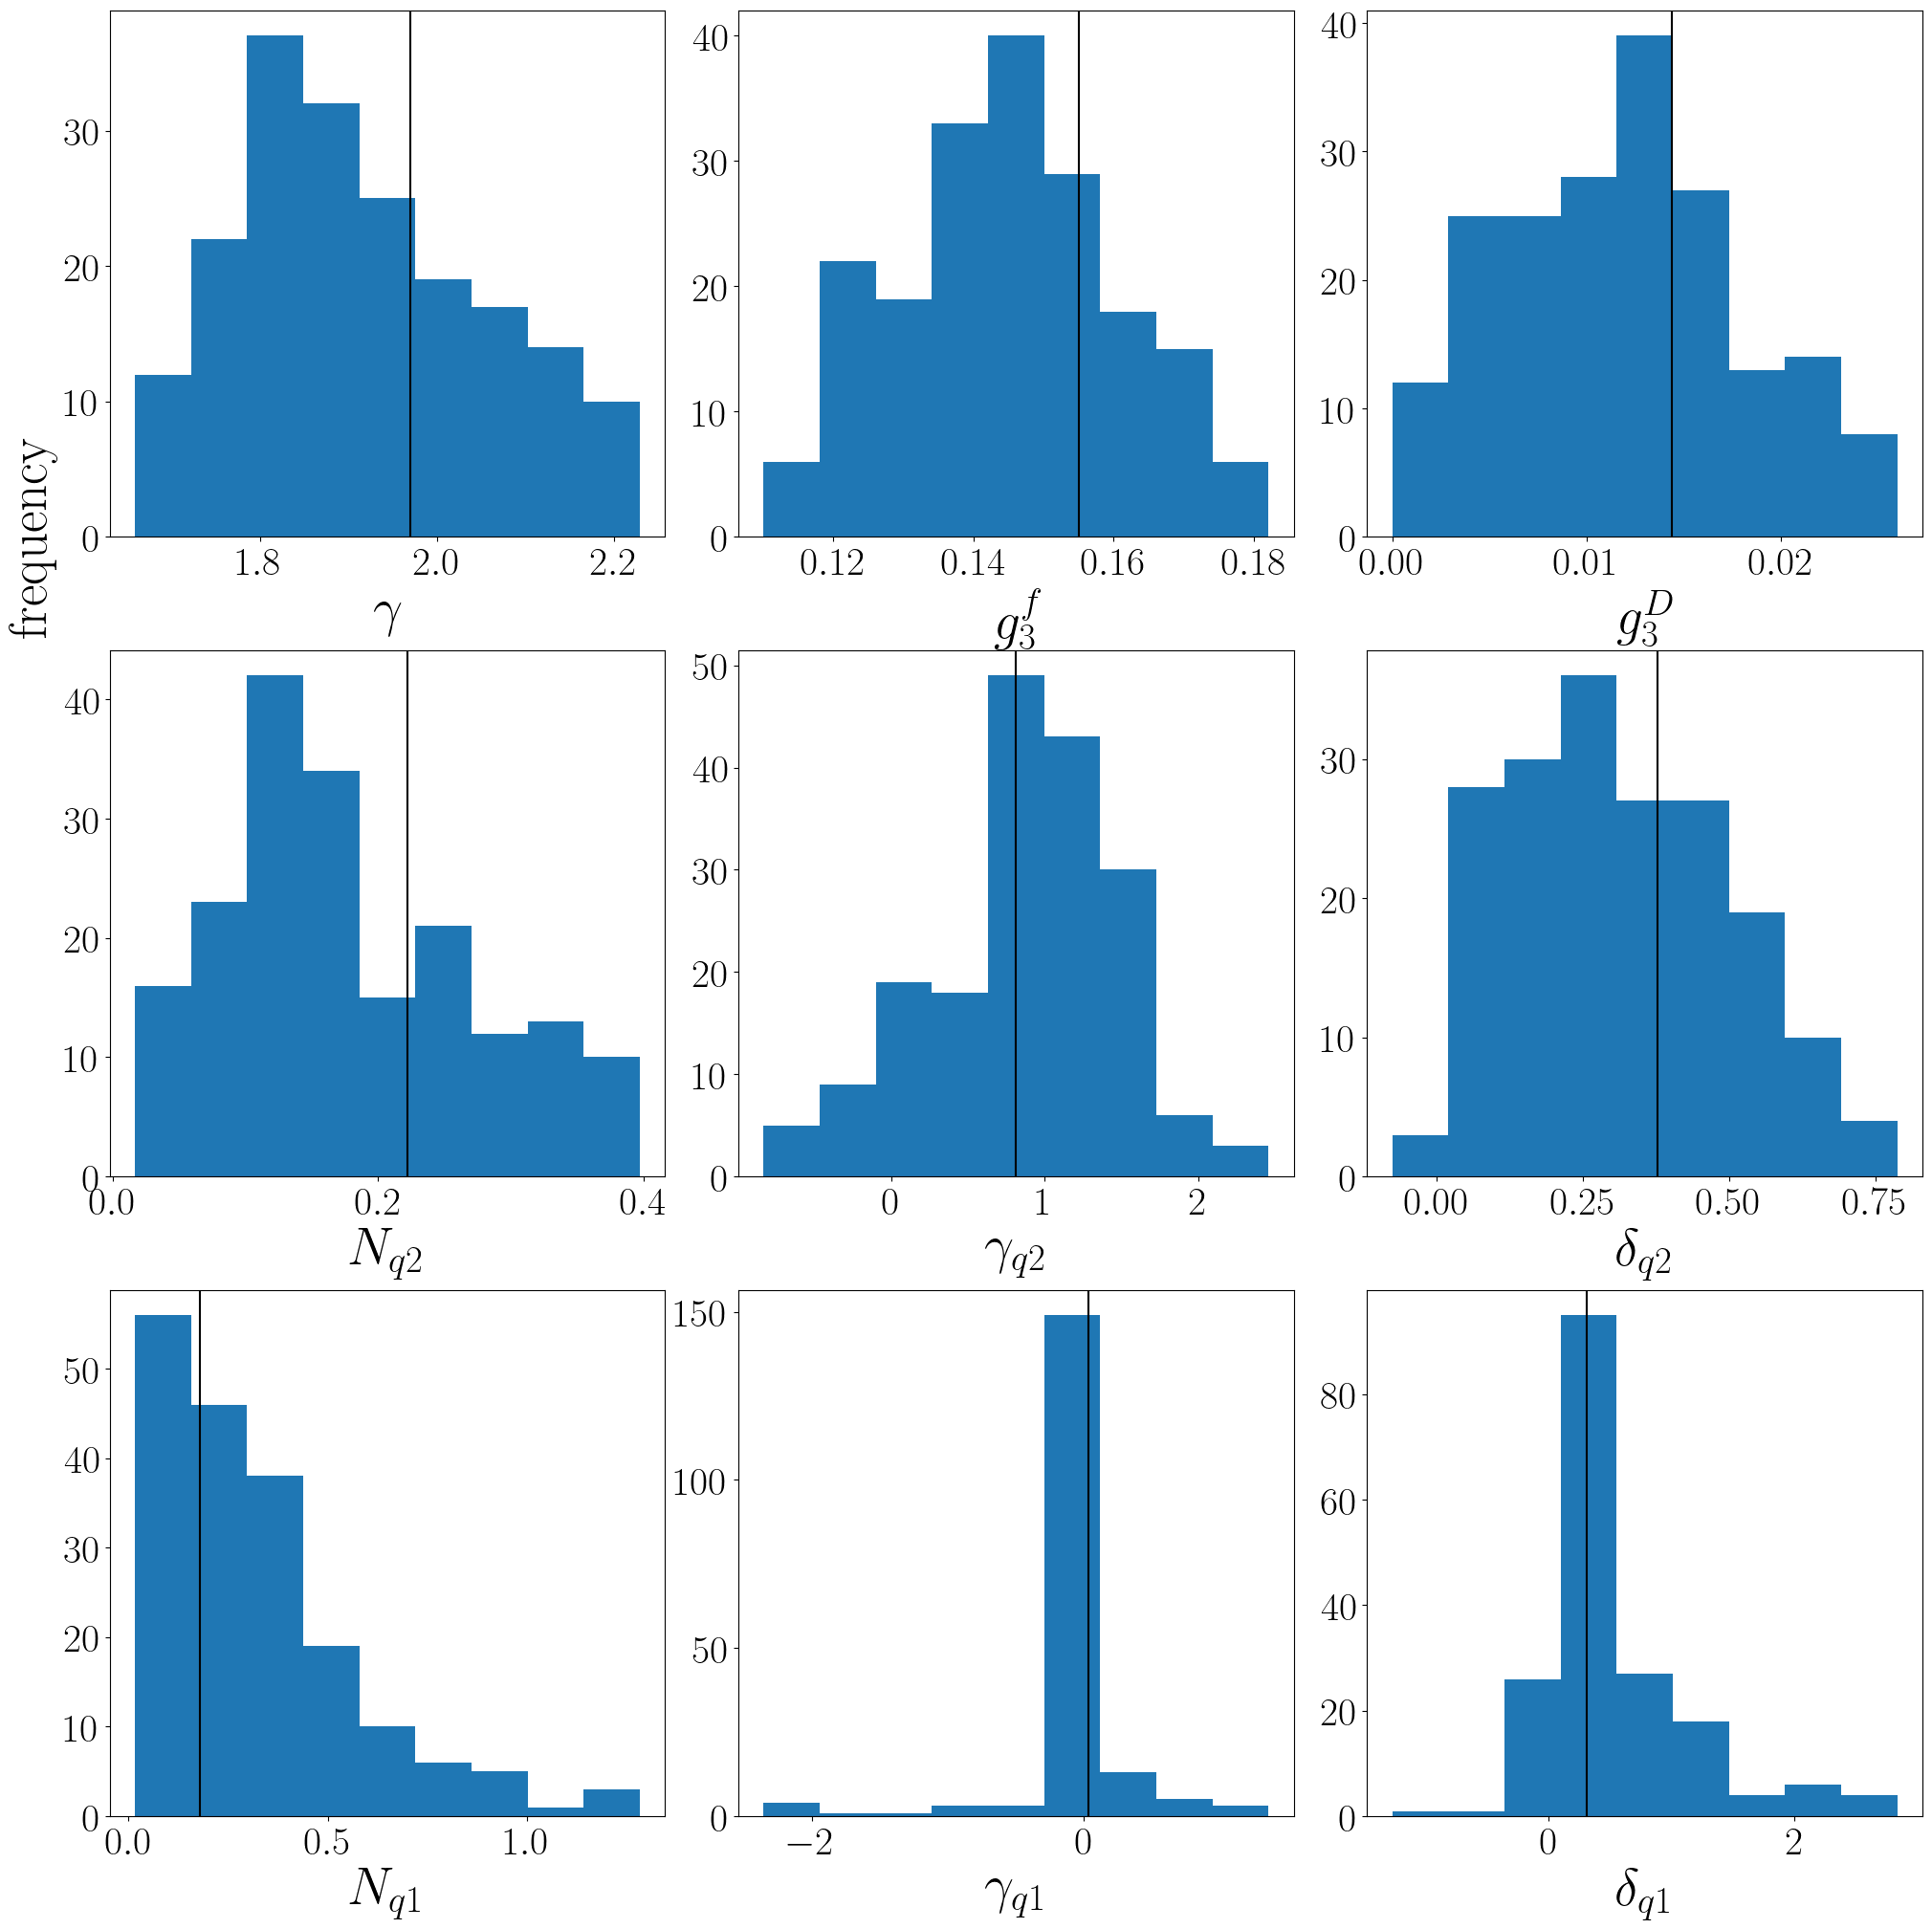

In [4]:
import pandas as pd
import numpy as np
import pylab as py
import warnings
from  matplotlib import rc
import matplotlib
#matplotlib.rcParams.update({'errorbar.cB2size': 2})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
warnings.filterwarnings('ignore')

xlabels = [r'\rm $\gamma$', r'\rm $g^f_3$', r'\rm $g^D_3$',r'\rm $N_{q2}$',  r'\rm $\gamma_{q2}$',  r'\rm $\delta_{q2}$', r'\rm $N_{q1}$',  r'\rm $\gamma_{q1}$',  r'\rm $\delta_{q1}$']
dfinit = pd.read_csv('params.dat', delim_whitespace=True)

#print ('gamma')
#print (np.sort(dfinit[:,0].tolist())[16] -dfinit[:,0].tolist()[0])
#print (dfinit[:,0].tolist()[0])
#print (np.sort(dfinit[:,0].tolist())[84]-dfinit[:,0].tolist()[0])

spacing = {}
spacing['gamma']    = 0.01
spacing['Nq1']    = 0.01
spacing['g3f']    = 0.01
spacing['Nq2']    = 0.01
spacing['gq1']    = 0.01
spacing['dq1']    = 0.01
spacing['gq2']    = 0.01
spacing['dq2']    = 0.01
spacing['g3D']    = 0.01

fig = py.figure(figsize = (20,20))
i = 0
keys = ['gamma','g3f','g3D','Nq2','gq2','dq2','Nq1','gq1','dq1']
for i in range(len(keys)):
  key = keys[i]
  print (i, key)
  arr = dfinit[key]
  data = arr[np.abs(arr - np.mean(arr)) <= 2 * np.std(arr)]
  #data = arr[(arr >= np.percentile(arr, 25) - 1.5 * (np.percentile(arr, 75) - np.percentile(arr, 25))) & (arr <= np.percentile(arr, 75) + 1.5 * (np.percentile(arr, 75) - np.percentile(arr, 25)))]
  print (dfinit[key])
  print("standard deviation for", key, ":",  np.std(data) )
  #binss = np.linspace(min(dfinit[key]),max(dfinit[key]),int(round((max(dfinit[key])-min(dfinit[key]))/spacing[key],0)))
  binss = np.linspace(min(data),max(data),10)
  ax = py.subplot(3,3,i+1)
  ax.hist(data, bins = binss)
  ax.axvline(dfinit[key].iloc[0],color = 'k')
  xlabel = xlabels[i]
  ax.set_xlabel(str(xlabel), fontsize = 40)
  if i == 0:
    ax.set_ylabel(r"$\rm frequency$", fontsize = 40,y=-0.)
  py.tick_params(labelsize=30)
  i+= 1
  axs = py.gca()
py.tight_layout(pad = 0.)
fig.savefig('parameter_hist.pdf',bbox_inches='tight')